In [2]:
from sklearn.datasets import fetch_20newsgroups
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from keras.layers import Embedding, Dense, LSTM, GRU
from keras.models import Sequential
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import string

Using TensorFlow backend.


In [3]:
categories = ['comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast']
# Prepare train and test data
data = fetch_20newsgroups(shuffle=True, subset='train', categories=categories)
test = fetch_20newsgroups(shuffle=True, subset='test', categories=categories)
news, news_topics, _classes = data.data, data.target, data.target_names

In [4]:
# Tokenize the sentences into words (1000)
words = 10000
tokenizer = Tokenizer(num_words=words)
tokenizer.fit_on_texts(news)
sequences = Tokenizer.texts_to_sequences(tokenizer, news)

In [5]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
max_length = 1000
X = pad_sequences(sequences, maxlen=max_length)
Y = keras.utils.to_categorical(news_topics)

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', Y.shape)

Found 55199 unique tokens.
Shape of data tensor: (4059, 1000)
Shape of label tensor: (4059, 7)


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2)
len(word_index)

55199

In [7]:
embedding_length = 64
model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(1, max_length)))
model.add(LSTM(100, dropout_W=0.25))
model.add(Dense(7, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            440400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 707       
Total params: 521,507
Trainable params: 521,507
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, dropout=0.25)`
  after removing the cwd from sys.path.


In [8]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3247, 1000), (3247, 7), (812, 1000), (812, 7))

In [9]:
import numpy as np
X_train = np.reshape(X_train, (X_train.shape[0], 1 , X_train.shape[1]))
X_valid = np.reshape(X_valid, (X_valid.shape[0], 1, X_valid.shape[1]))
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3247, 1, 1000), (3247, 7), (812, 1, 1000), (812, 7))

In [10]:
history=model.fit(X_train, y_train, epochs=20,verbose=True, validation_data=(X_valid,y_valid), batch_size=64)

Train on 3247 samples, validate on 812 samples
Epoch 1/20
3247/3247 [==============================] - 3s 887us/step - loss: 0.4098 - accuracy: 0.8571 - val_loss: 0.4087 - val_accuracy: 0.8571
Epoch 2/20
3247/3247 [==============================] - 1s 158us/step - loss: 0.4057 - accuracy: 0.8571 - val_loss: 0.4035 - val_accuracy: 0.8571
Epoch 3/20
3247/3247 [==============================] - 1s 169us/step - loss: 0.4005 - accuracy: 0.8571 - val_loss: 0.3986 - val_accuracy: 0.8571
Epoch 4/20
3247/3247 [==============================] - 1s 157us/step - loss: 0.3955 - accuracy: 0.8571 - val_loss: 0.3960 - val_accuracy: 0.8571
Epoch 5/20
3247/3247 [==============================] - 1s 164us/step - loss: 0.3948 - accuracy: 0.8571 - val_loss: 0.3978 - val_accuracy: 0.8571
Epoch 6/20
3247/3247 [==============================] - 1s 162us/step - loss: 0.3942 - accuracy: 0.8571 - val_loss: 0.3981 - val_accuracy: 0.8571
Epoch 7/20
3247/3247 [==============================] - 1s 170us/step - loss:

In [11]:
Loss,Accuracy = model.evaluate(X_valid, y_valid)
print("Loss value before adding embedding layer :", Loss)
print("Accuracy value before adding embedding layer:",Accuracy)

812/812 [==============================] - 0s 76us/step
Loss value before adding embedding layer : 0.3960046523016662
Accuracy value before adding embedding layer: 0.8566150665283203


In [12]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X, Y, test_size=0.2)
X_train1.shape, y_train1.shape, X_valid1.shape, y_valid1.shape

((3247, 1000), (3247, 7), (812, 1000), (812, 7))

In [13]:
model1 = Sequential()
# # add embedding layer
model1.add(Embedding(len(word_index), embedding_length, input_length=max_length))
model1.add(LSTM(100, dropout_W=0.25))
model1.add(Dense(7, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 64)          3532736   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 707       
Total params: 3,599,443
Trainable params: 3,599,443
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, dropout=0.25)`
  after removing the cwd from sys.path.


In [14]:
history1=model1.fit(X_train1, y_train1, epochs=20,verbose=True, validation_data=(X_valid1,y_valid1), batch_size=64)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3247 samples, validate on 812 samples
Epoch 1/20
3247/3247 [==============================] - 100s 31ms/step - loss: 0.4032 - accuracy: 0.8571 - val_loss: 0.3712 - val_accuracy: 0.8638
Epoch 2/20
3247/3247 [==============================] - 99s 31ms/step - loss: 0.3036 - accuracy: 0.8837 - val_loss: 0.3226 - val_accuracy: 0.8749
Epoch 3/20
3247/3247 [==============================] - 98s 30ms/step - loss: 0.2462 - accuracy: 0.9044 - val_loss: 0.2208 - val_accuracy: 0.9154
Epoch 4/20
3247/3247 [==============================] - 94s 29ms/step - loss: 0.1720 - accuracy: 0.9338 - val_loss: 0.2290 - val_accuracy: 0.9131
Epoch 5/20
3247/3247 [==============================] - 93s 29ms/step - loss: 0.1477 - accuracy: 0.9372 - val_loss: 0.1611 - val_accuracy: 0.9349
Epoch 6/20
3247/3247 [==============================] - 92s 28ms/step - loss: 0.0931 - accuracy: 0.9656 - val_loss: 0.1448 - val_accuracy: 0.9467
Epoch 7/20
3247/3247 [==============================] - 91s 28ms/step - loss

In [15]:
Loss,Accuracy = model1.evaluate(X_valid1, y_valid1)
print("Loss after embedding layer :", Loss)
print("Accuracy after adding embedding layer:",Accuracy)

812/812 [==============================] - 3s 4ms/step
Loss after embedding layer : 0.1202262038080563
Accuracy after adding embedding layer: 0.9653412103652954


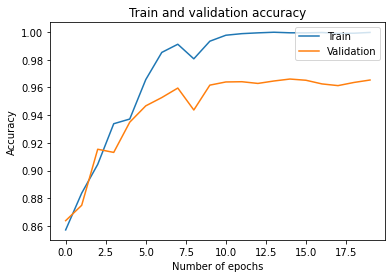

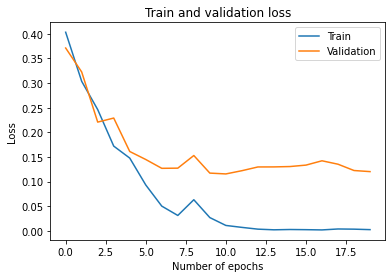

In [16]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Train and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()